# RNN model Stock

## 1. import package

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf


from pprint import pprint

from sklearn.utils import shuffle
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


## 2. Set hyperparameters

- 1. learning rate　: lr = 0.001
- 2. Parameter :　batch_size = 128
- 3. epoch : epochs = 10

In [3]:
lr =  0.0001
batch_size = 22
epochs = 100

## 3. Load data and preprocess
- 導入 28*28 mnist pixel的數字辨識圖  : tf.keras.datasets.mnist.load_data()
- 28*28 : 28個time_step每個time_step有28個維度

In [4]:
import pandas as pd
pima = pd.read_csv("./abcW_2.csv")
reverse_stockseq = pima.iloc[::-1]
reverse_stockseq.head()

,MACD,MACD-C3,MA5,TS-9,TS-6,Corp 3,Corp2,MA10,Target
299,0.11,-0.89,0.1,0,0,1,0,-0.25,0
298,0.21,-0.79,1.1,0,0,1,0,-0.10,0
297,0.11,1.11,1.8,0,0,-1,0,0.35,0
296,0.16,-0.84,1.4,-1,0,1,1,0.45,0
295,-0.04,0.96,0.5,0,0,-1,0,0.75,-1


In [5]:
#將 Target -1 -> 2
reverse_stockseq.iloc[0:299, 8][reverse_stockseq.iloc[0:299, 8]==-1]=2 

In [6]:
reverse_stockseq.head()
#reverse_stockseq.shape

,MACD,MACD-C3,MA5,TS-9,TS-6,Corp 3,Corp2,MA10,Target
299,0.11,-0.89,0.1,0,0,1,0,-0.25,0
298,0.21,-0.79,1.1,0,0,1,0,-0.10,0
297,0.11,1.11,1.8,0,0,-1,0,0.35,0
296,0.16,-0.84,1.4,-1,0,1,1,0.45,0
295,-0.04,0.96,0.5,0,0,-1,0,0.75,2


In [36]:
#統計 -1(2)總數 : 
#np.sum(reverse_stockseq.iloc[0:299, 8]==2)

64

In [7]:
# pandas -> numpy 
data = np.array(reverse_stockseq.iloc[0:300])
data.shape

(300, 9)

In [8]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data):
        X.append(data[i:i+window_size,:8]) # 前n筆資料訓練
        y.append(data[i+window_size-1,8])   # 最後一筆預測
        
        i += 1
    assert len(X) ==  len(y)  #做完所有資料return
    return np.array(X), np.int32(y)

window_size = 10
X, y = window_data(data, window_size)

In [44]:
#reverse_stockseq.iloc[0:299, 8]
#X = reverse_stockseq.iloc[0:299, 0:8].values # Features
#y = reverse_stockseq.iloc[0:299, 8:9].values  # Target variable
#y.shape

In [9]:
print("before_X=",X.shape)
print("before_y=",y.shape)
X = X.reshape([291, -1])
y = y.reshape([291, -1])
print(X.shape)
print(y.shape)

before_X= (291, 10, 8)
before_y= (291,)
(291, 80)
(291, 1)


In [10]:
# X = reverse_stockseq.iloc[0:299, 0:8].values # Features
# y = reverse_stockseq.iloc[0:299, 8:9].values  # Target variable

X_train1=X
y_train1=y 

X_test1 = X
y_test1 = y



# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 =  sc.fit_transform(X_test1)

X_train = X_train1[0:250].reshape([-1, 10, 8])
y_train = y_train1[0:250]

X_test = X_test1[250:].reshape([-1, 10, 8])
y_test = y_test1[250:]


#X_train1.shape
#y_train
#X_test
#y_test


In [11]:
print(X_train.shape)
print(y_train.shape)

(250, 10, 8)
(250, 1)


- 確認匯入進來的圖片 size 與 Appearance

In [48]:
# print('Data Shape', X_train[9].shape)  # 印出圖片shape 
# print('Label: ', y_train[0])

#plt.figure(figsize = (5,5)) #圖片size
#plt.imshow(x_train[1], cmap = 'gray') #try : cmap = binary :黑白灰階 
#plt.show()

- ### Data Preprocess 

- (Normalization / One-hot encoding)

In [14]:
y_train.dtype

dtype('int32')

In [ ]:
#Normalization
#X_train = X_train / 255.
#X_test = X_test / 255.


In [12]:
#one-hot encoding : -> [1,0,0] , [0,1,0] , [0,0,1]

y_train = np.eye(3)[np.int32(y_train[:])].reshape([-1,3])
y_test = np.eye(3)[np.int32(y_test[:])].reshape([-1,3])

In [12]:
y_train.shape

(250, 3)

In [17]:
y_train
y_test

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

- ### 定義Batch

In [13]:
def batch_gen(X, y, batch_size):
    X, y = shuffle(X, y)
    batch_index = 0
    
    while batch_index < len(X):
        batch_X = X[batch_index : batch_index+batch_size]
        batch_y = y[batch_index : batch_index+batch_size]
        batch_index += batch_size
        yield batch_X, batch_y

## 4. Build the graph (定義RNN Model) 

- 1.選擇 RNNcell , Ex : 這邊用BasicRNNCell , 此外還有許多其他的種類 例如 : RCN GRU...等<br>

- 2.使用dynamic_rnn 操作RNN網絡架構細節. 只需將這幾項輸入 "BasicRNN_cell, inputs, initial_state " ,即可運算<BR>
    
- 3.hidden layer(initial_state 如何設?) <br>
    兩種做法:<br>
    方法一 : initial_ state 跟output結果是一樣長的 : 
        a.設Batch_size : tf.shape(0), 
        b.output維度: 設定輸出維度 : (num_units=units) unit 可用其他維度替換 <br>
        c.init_state = tf.zeros([tf.shape(inputs)[0], units])<br>
        
    方法二 : 使用zero_state叫出batchsize : (tf.shape(inputs)[0])
input(Xt) , initial_state(ht)

In [14]:
def RNN_layer(inputs, units):
    
    BasicRNN_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=units)
    
    init_state = tf.zeros([tf.shape(inputs)[0], units])
    init_state = BasicRNN_cell.zero_state(tf.shape(inputs)[0], dtype=tf.float32) # shape = (batch, units)
    
    outputs, states = tf.nn.dynamic_rnn(BasicRNN_cell, inputs, initial_state=init_state)
    
    return outputs

In [58]:
#outputs

# 建立RNN MODEL : 
 - 1. 建立placeholder<BR>

 - 2. 轉換成output有32維 :
    with tf.variable_scope("RNN_layer"): <br>
    outputs = RNN_layer(input_data, 32)<br>
    
 - 3. 只需要取最後一個Time_step 座位最後輸出 :　RNN_last_outputs = outputs[:,-1,:]
 
 
 - 4. Evaluate : loss/ optimizer/ accuracy 

In [14]:
tf.reset_default_graph()

with tf.name_scope("inputs"):
    input_data = tf.placeholder(dtype=tf.float32, shape=[None, 10, 8], name='input_data')
    y_label = tf.placeholder(dtype=tf.float32, shape=[None, 3], name='label')

with tf.variable_scope("RNN_layer"):
    outputs = RNN_layer(input_data, 56)

with tf.variable_scope("output_layer"):
    RNN_last_outputs = outputs[:,-1,:]  # outputs shape = (batch, timestep, feature)
    prediction = tf.layers.dense(inputs=RNN_last_outputs, units=3)


# Evaluate  
    
with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction,labels=y_label))

with tf.name_scope("optimizer"):
    opt = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))    

init = tf.global_variables_initializer()

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


- check一下Output :   shape=(?, 28, 32)  
  - ? : batch_size,<br>
  - 時間序: t = 28 <br>
  - 我們要轉換成的維度: 32<br>
  


In [32]:
outputs

<tf.Tensor 'RNN_layer/rnn/transpose_1:0' shape=(?, 8, 32) dtype=float32>

我們只取最後一個時間點 : RNN_last_outputs
    
   - shape=(?, 32)
   - 時間序28只取最後1個timing
   

In [33]:
RNN_last_outputs

<tf.Tensor 'output_layer/strided_slice:0' shape=(?, 32) dtype=float32>

查看創建的變數 : 

  - 只看前面四筆!
  - shape : (Input維度 28維 + 轉換維度 32維 , 轉換32維) (M+N, M), shape=(60, 32)
  - dense(weight : 32接到10)
  - bias = 10個

In [34]:
tf.global_variables()

[<tf.Variable 'RNN_layer/rnn/basic_rnn_cell/kernel:0' shape=(33, 32) dtype=float32_ref>,
 <tf.Variable 'RNN_layer/rnn/basic_rnn_cell/bias:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'output_layer/dense/kernel:0' shape=(32, 3) dtype=float32_ref>,
 <tf.Variable 'output_layer/dense/bias:0' shape=(3,) dtype=float32_ref>,
 <tf.Variable 'optimizer/beta1_power:0' shape=() dtype=float32_ref>,
 <tf.Variable 'optimizer/beta2_power:0' shape=() dtype=float32_ref>,
 <tf.Variable 'RNN_layer/rnn/basic_rnn_cell/kernel/Adam:0' shape=(33, 32) dtype=float32_ref>,
 <tf.Variable 'RNN_layer/rnn/basic_rnn_cell/kernel/Adam_1:0' shape=(33, 32) dtype=float32_ref>,
 <tf.Variable 'RNN_layer/rnn/basic_rnn_cell/bias/Adam:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'RNN_layer/rnn/basic_rnn_cell/bias/Adam_1:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'output_layer/dense/kernel/Adam:0' shape=(32, 3) dtype=float32_ref>,
 <tf.Variable 'output_layer/dense/kernel/Adam_1:0' shape=(32, 3) dtype=float32_ref>,


In [104]:
lr =  0.0001
batch_size = 20
epochs = 100

- ## 建立MODEL更迅速的方式: tf.keras !!
    
    
    1.一樣先建立placeholder
    2.叫出keras.SimpleRNN(設定維度)(設定Input資料)
      !!! 在這邊 rnn_out的意思及表示最後時間序輸出 RNN_last_outputs  
    3.

In [15]:
# with tf.keras

tf.reset_default_graph()

with tf.name_scope("inputs"):
    input_data = tf.placeholder(dtype=tf.float32, shape=[None, 10, 8], name='input_data')
    y_label = tf.placeholder(dtype=tf.float32, shape=[None, 3], name='label')

with tf.variable_scope("RNN_layer"):
    rnn_out = tf.keras.layers.SimpleRNN(units=32)(input_data)

with tf.variable_scope("output_layer"):
    prediction = tf.layers.dense(inputs=rnn_out, units=3)

with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction,labels=y_label))

with tf.name_scope("optimizer"):
    opt = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


## 5. Train the model

In [16]:
sess = tf.Session()
sess.run(init)

In [62]:
#batch_size

In [17]:
for epoch_index in range(epochs):
    loss_ls, acc_ls = [], []
    get_batch = batch_gen(X_train, y_train, batch_size)
    
    for batch_X, batch_y in get_batch:
        _,  batch_acc, batch_loss = sess.run([opt, accuracy, loss], feed_dict={input_data: batch_X, y_label:batch_y})
        loss_ls.append(batch_loss)
        acc_ls.append(batch_acc)

 #   print("Epoch ", epoch_index)
  #  print("Accuracy ", np.mean(acc_ls), "     Loss ", np.mean(loss_ls))
   # print("__________________")

In [18]:
print("Test Accuracy:", sess.run(accuracy, feed_dict={input_data: X_test, y_label: y_test}))

Test Accuracy: 0.6097561


In [24]:
X_test.shape

(41, 10, 8)

In [19]:
sess.close()

## Practice 1
- ### 1. 把RNN cell換成LSTM觀察Accuracy是否會上升? (hint: tf.nn.rnn_cell.BasicLSTMCell)


In [28]:
# X_train1=X
# y_train1=y 

# X_test1 = X
# y_test1 = y



# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train1 = sc.fit_transform(X_train1)



# X_train = X_train1[0:250].reshape([-1, 7, 8])
# y_train = y_train1[0:250]

# X_test = X_test1[250:].reshape([-1, 7, 8])
# y_test = y_test1[250:]

# y_train = np.eye(3)[np.int32(y_train[:])].reshape([-1,3])
# y_test = np.eye(3)[np.int32(y_test[:])].reshape([-1,3])


# def batch_gen(X, y, batch_size):
#     X, y = shuffle(X, y)
#     batch_index = 0
    
#     while batch_index < len(X):
#         batch_X = X[batch_index : batch_index+batch_size]
#         batch_y = y[batch_index : batch_index+batch_size]
#         batch_index += batch_size
#         yield batch_X, batch_y

In [20]:
def RNN_layer(inputs, units):
    
    BasicRNN_cell = tf.nn.rnn_cell.BasicLSTMCell(num_units=units)
    
    init_state = tf.zeros([tf.shape(inputs)[0], units])
    init_state = BasicLSTM_cell.zero_state(tf.shape(inputs)[0], dtype=tf.float32) # shape = (batch, units)
    
    outputs, states = tf.nn.dynamic_rnn(BasicLSTMCell, inputs, initial_state=init_state)
    
    return outputs

In [21]:
tf.reset_default_graph()

with tf.name_scope("inputs"):
    input_data = tf.placeholder(dtype=tf.float32, shape=[None, 10, 8], name='input_data')
    y_label = tf.placeholder(dtype=tf.float32, shape=[None, 3], name='label')

with tf.variable_scope("LSTM_layer"):
    rnn_out = tf.keras.layers.LSTM(units=56)(input_data)

with tf.variable_scope("output_layer"):
    prediction = tf.layers.dense(inputs=rnn_out, units=3)

with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction,labels=y_label))

with tf.name_scope("optimizer"):
    opt = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))    

init = tf.global_variables_initializer()

In [22]:
sess = tf.Session()
sess.run(init)

In [23]:
for epoch_index in range(epochs):
    loss_ls, acc_ls = [], []
    get_batch = batch_gen(X_train, y_train, batch_size)
    
    for batch_X, batch_y in get_batch:
        _,  batch_acc, batch_loss = sess.run([opt, accuracy, loss], feed_dict={input_data: batch_X, y_label:batch_y})
        loss_ls.append(batch_loss)
        acc_ls.append(batch_acc)

  #  print("Epoch ", epoch_index)
  #  print("Accuracy ", np.mean(acc_ls), "     Loss ", np.mean(loss_ls))
  #  print("__________________")    

In [24]:
print("Test Accuracy:", sess.run(accuracy, feed_dict={input_data: X_test, y_label: y_test}))        

Test Accuracy: 0.6097561


- ### 2. 把RNN cell換成GRU觀察Accuracy是否會上升? (hint: tf.nn.rnn_cell.GRUCell)


In [34]:
lr =  0.0001
batch_size = 20
epochs = 100

In [35]:
tf.reset_default_graph()

with tf.name_scope("inputs"):
    input_data = tf.placeholder(dtype=tf.float32, shape=[None, 10, 8], name='input_data')
    y_label = tf.placeholder(dtype=tf.float32, shape=[None, 3], name='label')

with tf.variable_scope("GRU_layer"):
    rnn_out = tf.keras.layers.GRU(units=55)(input_data)

with tf.variable_scope("output_layer"):
    prediction = tf.layers.dense(inputs=rnn_out, units=3)

with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction,labels=y_label))

with tf.name_scope("optimizer"):
    opt = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))    

init = tf.global_variables_initializer()

In [36]:
sess = tf.Session()
sess.run(init)

In [37]:
for epoch_index in range(epochs):
    loss_ls, acc_ls = [], []
    get_batch = batch_gen(X_train, y_train, batch_size)
    
    for batch_X, batch_y in get_batch:
        _,  batch_acc, batch_loss = sess.run([opt, accuracy, loss], feed_dict={input_data: batch_X, y_label:batch_y})
        loss_ls.append(batch_loss)
        acc_ls.append(batch_acc)

#    print("Epoch ", epoch_index)
#    print("Accuracy ", np.mean(acc_ls), "     Loss ", np.mean(loss_ls))
#    print("__________________")   

In [38]:
print("Test Accuracy:", sess.run(accuracy, feed_dict={input_data: X_test, y_label: y_test}))       

Test Accuracy: 0.6097561


## Practice 2
把手寫數字兩張平行輸入到model預測，輸入資料變成time_step = 28, input_data_dimension = 56

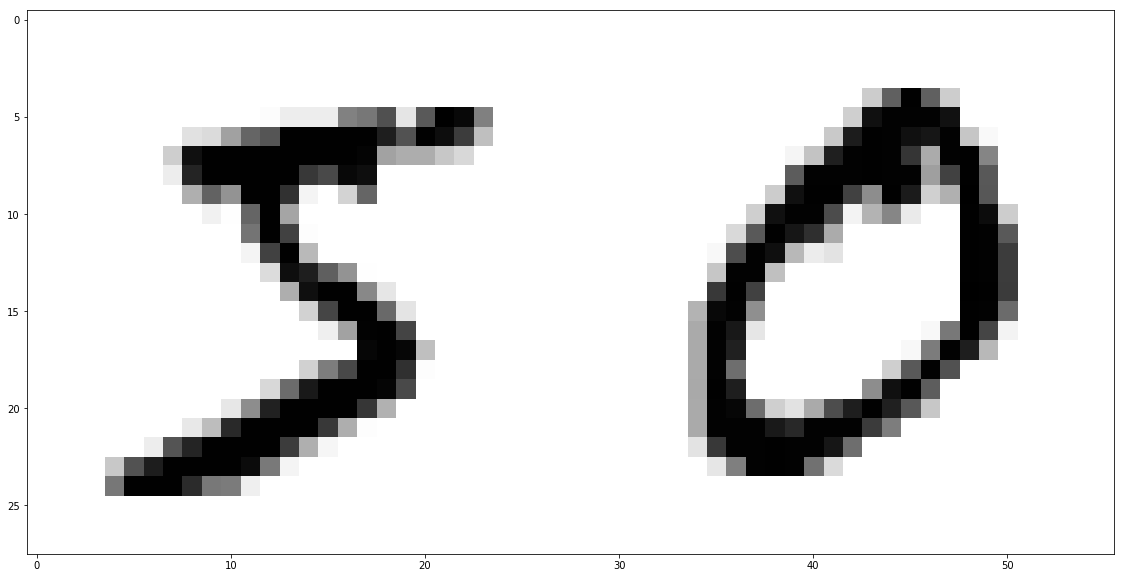

In [4]:
#show training data
plt.figure(figsize=(20,10))
img1 = x_train[0]
img2 = x_train[1]
img = np.concatenate((img1,img2),axis=1)  
plt.imshow(img, cmap='binary')
plt.show()

In [5]:
# x_train = x_train / 255.
# x_test = x_test / 255.

# #one-hot encoding
# y_train = np.eye(10)[y_train[:]]
# y_test = np.eye(10)[y_test[:]]

In [6]:
def batch_gen(X, y, batch_size):
    X, y = shuffle(X, y)
    batch_index = 0
    
    while batch_index < len(X):
        batch_X = X[batch_index : batch_index+batch_size]
        batch_y = y[batch_index : batch_index+batch_size]
        batch_index += batch_size
        yield batch_X, batch_y

In [7]:
tf.reset_default_graph()

with tf.name_scope("inputs"):
    input_data = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='input_data')
    y_label = tf.placeholder(dtype=tf.float32, shape=[None, 10], name='label')

with tf.variable_scope("RNN_layer"):
    rnn_out = tf.keras.layers.SimpleRNN(units=56)(input_data)

with tf.variable_scope("output_layer"):
    prediction = tf.layers.dense(inputs=rnn_out, units=10)

with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction,labels=y_label))

with tf.name_scope("optimizer"):
    opt = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))    

init = tf.global_variables_initializer()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [8]:
sess = tf.Session()
sess.run(init)

In [9]:
for epoch_index in range(epochs):
    loss_ls, acc_ls = [], []
    get_batch = batch_gen(x_train, y_train, batch_size)
    
    for batch_X, batch_y in get_batch:
        _,  batch_acc, batch_loss = sess.run([opt, accuracy, loss], feed_dict={input_data: batch_X, y_label:batch_y})
        loss_ls.append(batch_loss)
        acc_ls.append(batch_acc)

    print("Epoch ", epoch_index)
    print("Accuracy ", np.mean(acc_ls), "     Loss ", np.mean(loss_ls))
    print("__________________")   

Epoch  0
Accuracy  0.7566576      Loss  0.7860067
__________________
Epoch  1
Accuracy  0.89718264      Loss  0.3600037
__________________
Epoch  2
Accuracy  0.91836023      Loss  0.28714517
__________________
Epoch  3
Accuracy  0.9303982      Loss  0.24651988
__________________
Epoch  4
Accuracy  0.93665045      Loss  0.22317748
__________________
Epoch  5
Accuracy  0.9409093      Loss  0.20675164
__________________
Epoch  6
Accuracy  0.94696164      Loss  0.18967788
__________________
Epoch  7
Accuracy  0.94796664      Loss  0.18363197
__________________
Epoch  8
Accuracy  0.95192564      Loss  0.16930941
__________________
Epoch  9
Accuracy  0.9552128      Loss  0.16080622
__________________


- ### LSTM

In [17]:
tf.reset_default_graph()

with tf.name_scope("inputs"):
    input_data = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='input_data')
    y_label = tf.placeholder(dtype=tf.float32, shape=[None, 10], name='label')

with tf.variable_scope("LSTM_layer"):
    rnn_out = tf.keras.layers.LSTM(units=56)(input_data)

with tf.variable_scope("output_layer"):
    prediction = tf.layers.dense(inputs=rnn_out, units=10)

with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction,labels=y_label))

with tf.name_scope("optimizer"):
    opt = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))    

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

In [18]:
for epoch_index in range(epochs):
    loss_ls, acc_ls = [], []
    get_batch = batch_gen(x_train, y_train, batch_size)
    
    for batch_X, batch_y in get_batch:
        _,  batch_acc, batch_loss = sess.run([opt, accuracy, loss], feed_dict={input_data: batch_X, y_label:batch_y})
        loss_ls.append(batch_loss)
        acc_ls.append(batch_acc)

    print("Epoch ", epoch_index)
    print("Accuracy ", np.mean(acc_ls), "     Loss ", np.mean(loss_ls))
    print("__________________")  

Epoch  0
Accuracy  0.7791789      Loss  0.69145596
__________________
Epoch  1
Accuracy  0.9390547      Loss  0.20668374
__________________
Epoch  2
Accuracy  0.95751154      Loss  0.14267193
__________________
Epoch  3
Accuracy  0.9657849      Loss  0.11333728
__________________
Epoch  4
Accuracy  0.97146523      Loss  0.09473352
__________________
Epoch  5
Accuracy  0.97435254      Loss  0.08407584
__________________
Epoch  6
Accuracy  0.9786947      Loss  0.0709015
__________________
Epoch  7
Accuracy  0.98030496      Loss  0.06577982
__________________
Epoch  8
Accuracy  0.982526      Loss  0.057980765
__________________
Epoch  9
Accuracy  0.9842084      Loss  0.053839434
__________________


In [19]:
print("Test Accuracy:", sess.run(accuracy, feed_dict={input_data: x_test, y_label: y_test}))        

Test Accuracy: 0.981


- ### GRU

In [20]:
tf.reset_default_graph()

with tf.name_scope("inputs"):
    input_data = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='input_data')
    y_label = tf.placeholder(dtype=tf.float32, shape=[None, 10], name='label')

with tf.variable_scope("GRU_layer"):
    rnn_out = tf.keras.layers.GRU(units=56)(input_data)

with tf.variable_scope("output_layer"):
    prediction = tf.layers.dense(inputs=rnn_out, units=10)

with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction,labels=y_label))

with tf.name_scope("optimizer"):
    opt = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))    

init = tf.global_variables_initializer()

In [21]:
sess = tf.Session()
sess.run(init)

for epoch_index in range(epochs):
    loss_ls, acc_ls = [], []
    get_batch = batch_gen(x_train, y_train, batch_size)
    
    for batch_X, batch_y in get_batch:
        _,  batch_acc, batch_loss = sess.run([opt, accuracy, loss], feed_dict={input_data: batch_X, y_label:batch_y})
        loss_ls.append(batch_loss)
        acc_ls.append(batch_acc)

    print("Epoch ", epoch_index)
    print("Accuracy ", np.mean(acc_ls), "     Loss ", np.mean(loss_ls))
    print("__________________") 

Epoch  0
Accuracy  0.68169194      Loss  0.92351145
__________________
Epoch  1
Accuracy  0.91298527      Loss  0.2972057
__________________
Epoch  2
Accuracy  0.94554573      Loss  0.18404277
__________________
Epoch  3
Accuracy  0.9600602      Loss  0.1334661
__________________
Epoch  4
Accuracy  0.9679504      Loss  0.1085466
__________________
Epoch  5
Accuracy  0.97233695      Loss  0.092760995
__________________
Epoch  6
Accuracy  0.9755797      Loss  0.08218741
__________________
Epoch  7
Accuracy  0.9778563      Loss  0.073058106
__________________
Epoch  8
Accuracy  0.9806548      Loss  0.06482837
__________________
Epoch  9
Accuracy  0.9817486      Loss  0.06075497
__________________


In [22]:
print("Test Accuracy:", sess.run(accuracy, feed_dict={input_data: x_test, y_label: y_test}))        


Test Accuracy: 0.9777


RNN 100

In [7]:
tf.reset_default_graph()

with tf.name_scope("inputs"):
    input_data = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='input_data')
    y_label = tf.placeholder(dtype=tf.float32, shape=[None, 10], name='label')

with tf.variable_scope("RNN_layer"):
    rnn_out = tf.keras.layers.SimpleRNN(units=100)(input_data)

with tf.variable_scope("output_layer"):
    prediction = tf.layers.dense(inputs=rnn_out, units=10)

with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction,labels=y_label))

with tf.name_scope("optimizer"):
    opt = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))    

init = tf.global_variables_initializer()

In [8]:
sess = tf.Session()
sess.run(init)

for epoch_index in range(epochs):
    loss_ls, acc_ls = [], []
    get_batch = batch_gen(x_train, y_train, batch_size)
    
    for batch_X, batch_y in get_batch:
        _,  batch_acc, batch_loss = sess.run([opt, accuracy, loss], feed_dict={input_data: batch_X, y_label:batch_y})
        loss_ls.append(batch_loss)
        acc_ls.append(batch_acc)

    print("Epoch ", epoch_index)
    print("Accuracy ", np.mean(acc_ls), "     Loss ", np.mean(loss_ls))
    print("__________________") 

Epoch  0
Accuracy  0.843489      Loss  0.51268744
__________________
Epoch  1
Accuracy  0.9321695      Loss  0.2313214
__________________
Epoch  2
Accuracy  0.9474669      Loss  0.18275169
__________________
Epoch  3
Accuracy  0.9550961      Loss  0.15722844
__________________
Epoch  4
Accuracy  0.9580446      Loss  0.1451658
__________________
Epoch  5
Accuracy  0.96495205      Loss  0.12429775
__________________
Epoch  6
Accuracy  0.9658627      Loss  0.12052713
__________________
Epoch  7
Accuracy  0.96726745      Loss  0.11331634
__________________
Epoch  8
Accuracy  0.9699327      Loss  0.10467012
__________________
Epoch  9
Accuracy  0.9711599      Loss  0.09927214
__________________


In [ ]:
print("Test Accuracy:", sess.run(accuracy, feed_dict={input_data: x_test, y_label: y_test}))        


LSTM 100

In [9]:
tf.reset_default_graph()

with tf.name_scope("inputs"):
    input_data = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='input_data')
    y_label = tf.placeholder(dtype=tf.float32, shape=[None, 10], name='label')

with tf.variable_scope("LSTM_layer"):
    rnn_out = tf.keras.layers.LSTM(units=100)(input_data)

with tf.variable_scope("output_layer"):
    prediction = tf.layers.dense(inputs=rnn_out, units=10)

with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction,labels=y_label))

with tf.name_scope("optimizer"):
    opt = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))    

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

In [10]:
for epoch_index in range(epochs):
    loss_ls, acc_ls = [], []
    get_batch = batch_gen(x_train, y_train, batch_size)
    
    for batch_X, batch_y in get_batch:
        _,  batch_acc, batch_loss = sess.run([opt, accuracy, loss], feed_dict={input_data: batch_X, y_label:batch_y})
        loss_ls.append(batch_loss)
        acc_ls.append(batch_acc)

    print("Epoch ", epoch_index)
    print("Accuracy ", np.mean(acc_ls), "     Loss ", np.mean(loss_ls))
    print("__________________")  

Epoch  0
Accuracy  0.8184913      Loss  0.5676457
__________________
Epoch  1
Accuracy  0.95134264      Loss  0.16121063
__________________
Epoch  2
Accuracy  0.9682114      Loss  0.109148845
__________________
Epoch  3
Accuracy  0.9746802      Loss  0.08413724
__________________
Epoch  4
Accuracy  0.9786114      Loss  0.071018115
__________________
Epoch  5
Accuracy  0.98203176      Loss  0.058878724
__________________
Epoch  6
Accuracy  0.98427504      Loss  0.05076241
__________________
Epoch  7
Accuracy  0.985591      Loss  0.045725904
__________________
Epoch  8
Accuracy  0.98704576      Loss  0.041170955
__________________
Epoch  9
Accuracy  0.9888337      Loss  0.035214934
__________________


In [11]:
print("Test Accuracy:", sess.run(accuracy, feed_dict={input_data: x_test, y_label: y_test}))        

Test Accuracy: 0.983


GRU 100

In [8]:
tf.reset_default_graph()

with tf.name_scope("inputs"):
    input_data = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='input_data')
    y_label = tf.placeholder(dtype=tf.float32, shape=[None, 10], name='label')

with tf.variable_scope("GRU_layer"):
    rnn_out = tf.keras.layers.GRU(units=100)(input_data)

with tf.variable_scope("output_layer"):
    prediction = tf.layers.dense(inputs=rnn_out, units=10)

with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction,labels=y_label))

with tf.name_scope("optimizer"):
    opt = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))    

init = tf.global_variables_initializer()

In [9]:
sess = tf.Session()
sess.run(init)

for epoch_index in range(epochs):
    loss_ls, acc_ls = [], []
    get_batch = batch_gen(x_train, y_train, batch_size)
    
    for batch_X, batch_y in get_batch:
        _,  batch_acc, batch_loss = sess.run([opt, accuracy, loss], feed_dict={input_data: batch_X, y_label:batch_y})
        loss_ls.append(batch_loss)
        acc_ls.append(batch_acc)

    print("Epoch ", epoch_index)
    print("Accuracy ", np.mean(acc_ls), "     Loss ", np.mean(loss_ls))
    print("__________________")

Epoch  0
Accuracy  0.77233255      Loss  0.67397505
__________________
Epoch  1
Accuracy  0.94938815      Loss  0.1720536
__________________
Epoch  2
Accuracy  0.9659848      Loss  0.11458288
__________________
Epoch  3
Accuracy  0.9736141      Loss  0.08664762
__________________
Epoch  4
Accuracy  0.9784615      Loss  0.07254567
__________________
Epoch  5
Accuracy  0.9815265      Loss  0.059818693
__________________
Epoch  6
Accuracy  0.9841529      Loss  0.051573038
__________________
Epoch  7
Accuracy  0.98600745      Loss  0.045067307
__________________
Epoch  8
Accuracy  0.9875122      Loss  0.04120541
__________________
Epoch  9
Accuracy  0.988495      Loss  0.035802316
__________________


In [10]:
print("Test Accuracy:", sess.run(accuracy, feed_dict={input_data: x_test, y_label: y_test}))        


Test Accuracy: 0.9832
